# What is Unsupervised learning?


Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

# What is K-Means Clustering ? 

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

In [9]:
#importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#Reading the data
data = pd.read_csv(r'C:\Users\Ram\The Sparks Foundation\iris.csv')


In [5]:
#Shape of Data
print(data.shape)
print("Data has {} rows and {} columns".format(data.shape[0],data.shape[1]))

(150, 6)
Data has 150 rows and 6 columns


In [4]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
#Description of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Looking into the data
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


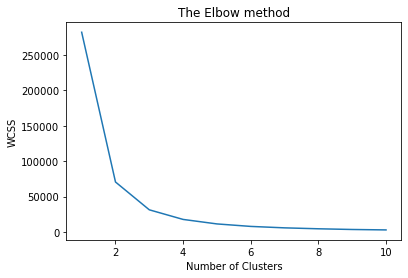

In [11]:
#Finding the optimum number of clusters for k means Classifcation 
x = data.iloc[:,[0,1,2,3]].values

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Potting the results onto a line graph,
# allowing us to observe 'the elbow'
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

You Can see why it is called the elbow method ,the optimum clusters lies where the elbow occurs.
Therefore we choose 3 as the number of clusters.

In [17]:
#Applying KMeans to the dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

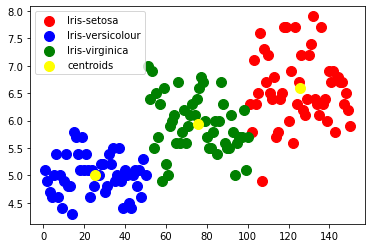

In [20]:
#Visualization of the clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label = 'centroids')
plt.legend()